In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
train_df=pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)
test_df=pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)

In [4]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
x_train=X_train
Y_train=y_train
x_test=X_test
Y_test=y_test
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [5]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    history=model.fit(X_train, y_train,epochs=15, batch_size=128,validation_data=(X_test,y_test))
    return(model,history)

In [6]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [7]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
import keras


model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/15
685/685 [==============================] - 4s 6ms/step - loss: 0.1297 - accuracy: 0.9640 - val_loss: 0.1180 - val_accuracy: 0.9728
Epoch 2/15
685/685 [==============================] - 4s 6ms/step - loss: 0.0701 - accuracy: 0.9797 - val_loss: 0.0908 - val_accuracy: 0.9750
Epoch 3/15
685/685 [==============================] - 4s 6ms/step - loss: 0.0522 - accuracy: 0.9844 - val_loss: 0.0911 - val_accuracy: 0.9741
Epoch 4/15
685/685 [==============================] - 4s 6ms/step - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.0732 - val_accuracy: 0.9805
Epoch 5/15
685/685 [==============================] - 4s 6ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0710 - val_accuracy: 0.9822
Epoch 6/15
685/685 [==============================] - 4s 6ms/step - loss: 0.0326 - accuracy: 0.9894 - val_loss: 0.0719 - val_accuracy: 0.9819
Epoch 7/15
685/685 [==============================] - 4s 6ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0674 - val_accuracy: 0.9837
Epoch 

Accuracy: 98.50%


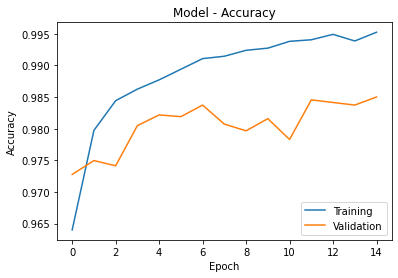

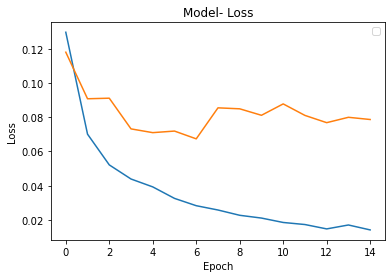

In [8]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

In [9]:
# Compute confusion matrix
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
c_report=classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cnf_matrix)
print(c_report)

[[18038    61    11     5     3]
 [   94   453     7     0     2]
 [   59     6  1365    15     3]
 [   25     0    15   122     0]
 [   21     0     1     0  1586]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18118
           1       0.87      0.81      0.84       556
           2       0.98      0.94      0.96      1448
           3       0.86      0.75      0.80       162
           4       0.99      0.99      0.99      1608

    accuracy                           0.99     21892
   macro avg       0.94      0.90      0.92     21892
weighted avg       0.98      0.99      0.98     21892



In [10]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,Y_train)
y_pred=model.predict(x_test)
cm1=confusion_matrix(Y_test.argmax(axis=1),y_pred.argmax(axis=1))
print(cm1)
cr1=classification_report(Y_test.argmax(axis=1),y_pred.argmax(axis=1))
print(cr1)

[[17686   184   129    45    74]
 [  187   354     8     5     2]
 [  150    13  1241    26    18]
 [   41     1    22    97     1]
 [   78     6    20     0  1504]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18118
           1       0.63      0.64      0.64       556
           2       0.87      0.86      0.87      1448
           3       0.56      0.60      0.58       162
           4       0.94      0.94      0.94      1608

    accuracy                           0.95     21892
   macro avg       0.80      0.80      0.80     21892
weighted avg       0.95      0.95      0.95     21892



In [11]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,Y_train)
y_pred=model.predict(x_test)
cm1=confusion_matrix(Y_test.argmax(axis=1),y_pred.argmax(axis=1))
print(cm1)
cr1=classification_report(Y_test.argmax(axis=1),y_pred.argmax(axis=1))
print(cr1)

[[18108     4     5     0     1]
 [  233   322     0     0     1]
 [  187     0  1248    11     2]
 [   60     0    10    92     0]
 [   98     0     1     0  1509]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18118
           1       0.99      0.58      0.73       556
           2       0.99      0.86      0.92      1448
           3       0.89      0.57      0.69       162
           4       1.00      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.97      0.79      0.86     21892
weighted avg       0.97      0.97      0.97     21892



In [12]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(x_train,Y_train)
y_pred=model.predict(x_test)
cm1=confusion_matrix(Y_test.argmax(axis=1),y_pred.argmax(axis=1))
print(cm1)
cr1=classification_report(Y_test.argmax(axis=1),y_pred.argmax(axis=1))
print(cr1)

[[18035    40    33     2     8]
 [  164   385     5     1     1]
 [   83    14  1340     7     4]
 [   44     0    25    93     0]
 [   58     8    13     0  1529]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18118
           1       0.86      0.69      0.77       556
           2       0.95      0.93      0.94      1448
           3       0.90      0.57      0.70       162
           4       0.99      0.95      0.97      1608

    accuracy                           0.98     21892
   macro avg       0.94      0.83      0.87     21892
weighted avg       0.98      0.98      0.98     21892

